<a href="https://colab.research.google.com/github/Ishwar9109/Playstore-App-Review-Analysis/blob/main/Ishwar_Rao's_Analysis_on_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In this notebook, I'm gonna analyze Google Play Store datas. While I was analyzing the data, I used Python. This study is my first data analyzing study.

Google Play Store apps and reviews Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.

Let's take a look at the data, which consists of two files:

*  **playstore data.csv**: contains all the details of the applications on Google Play. There are 13 features that describe a given app.
*  **user_reviews.csv**: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

# Problem Statements
1.  What are the top categories on Play Store?
2.  Are majority of the apps Paid or Free?
3.  How importance is the rating of the application?
4.  Which categories from the audience should the app be based on?
5.  Which category has the most no. of installations?
6.  How does the count of apps varies by Genres?
7.  How does the last update has an effect on the rating?
8.  How are ratings affected when the app is a paid one?
9.  How are reviews and ratings co-related?
10. Lets us discuss the sentiment subjectivity.
11. Is subjectivity and polarity proportional to each other?
12. What is the percentage of review sentiments?
13. How is sentiment polarity varying for paid and free apps?
14. How Content Rating affect over the App?
15. Does Last Update date has an effects on rating?
16. Distribution of App update over the Year.
17. Distribution of Paid and Free app updated over the Month.

# **Importing necessary libraries**

In [ ]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **Mounting my google drive**

In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Lets Explore play store DataFrame**

In [ ]:
# loading csv File
playstore_data_path='/content/drive/MyDrive/Play Store Data.csv'
playstore_df=pd.read_csv(playstore_data_path)

In [ ]:
# Display the Play Store App data
play_store_data=pd.concat([playstore_df.head(),playstore_df.tail()])
play_store_data


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
playstore_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
# Finding the number of rows and columns in the given dataset
print(playstore_df.columns)
rows=playstore_df.shape[0]
columns=playstore_df.shape[1]
print(f"the no of rows is {rows} and no of columns is {columns}")

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
the no of rows is 10841 and no of columns is 13


**Let us first define what information the columns contain based on our inspection.**

play_store dataframe has 10841 rows and 13 columns. The 13 columns are identified as below:

1. **App** - It tells us about the name of the application with a short description (optional).

2. **Category** - It gives the category to the app.

3. **Rating** - It contains the average rating the respective app received from its users.

4. **Reviews** - It tells us about the total number of users who have given a review for the application.

5. **Size** - It tells us about the size being occupied the application on the mobile phone.

6. **Installs** - It tells us about the total number of installs/downloads for an application.

7. **Type** - IIt states whether an app is free to use or paid.

8. **Price** - It gives the price payable to install the app. For free type apps, the price is zero.

9. **Content Rating** - It states whether or not an app is suitable for all age groups or not.

10. **Genres** - It tells us about the various other categories to which an application can belong.

11. **Last Updated** - It tells us about the when the application was updated.

12. **Current Ver** - It tells us about the current version of the application. 13.Android Ver - It tells us about the android version which can support the application on its platform.

# **Cleaning of the data**

The three features that we will be working with most frequently henceforth are Installs, Size, and Price. A careful glance of the dataset reveals that some of these columns mandate data cleaning in order to be consumed by code we'll write later. Specifically, the presence of special characters (, $ +) and letters (M k) in the Installs, Size, and Price columns make their conversion to a numerical data type difficult. Let's clean by removing these and converting each column to a numeric type.

Removing the Nan value and Duplicate present in the data set

# **Handling the NaN values in the Play store data**

In [ ]:
# This user define function will give the type,count of null and non null values as well as null ratio
def playstoreinfo():
  temp=pd.DataFrame(index=playstore_df.columns)
  temp["datatype"]=playstore_df.dtypes
  temp["not null values"]=playstore_df.count()
  temp["null value"]=playstore_df.isnull().sum()
  temp["% of the null value"]=playstore_df.isnull().mean()
  temp["unique count"]=playstore_df.nunique()
  return temp
playstoreinfo()

,datatype,not null values,null value,% of the null value,unique count
App,object,10841,0,0.000000,9660
Category,object,10841,0,0.000000,34
Rating,float64,9367,1474,0.135965,40
Reviews,object,10841,0,0.000000,6002
Size,object,10841,0,0.000000,462
Installs,object,10841,0,0.000000,22
Type,object,10840,1,0.000092,3
Price,object,10841,0,0.000000,93
Content Rating,object,10840,1,0.000092,6
Genres,object,10841,0,0.000000,120


**Findings**

### The number of null values are:

Rating has 1474 null values which contributes 13.60% of the data. Type has 1 null value which contributes 0.01% of the data. Content_Rating has 1 null value which contributes 0.01% of the data. Current_Ver has 8 null values which contributes 0.07% of the data. Android_Ver has 3 null values which contributes 0.03% of the data.

Lets first deal with the columns which contains lesser number of NaN values. By going through the NaN values, we must come up with a way to replace them with non NaN values or we need to come up with a reason for having NaN.




---



### **1).  Type: There is only one NaN value in this column.**

In [ ]:
# The row containing NaN values in the Type column
playstore_df[playstore_df["Type"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:
# Finding the different values the 'Type' column takes
playstore_df["Type"].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

The **Type** column contains only two entries, namely, **Free  and Paid** . Also, if the app is of **Type**-**Paid**, the **Price** of that app will be printed in the corresponding Price column, else, it will show as '0'. In this case, the price for the respective app is printed as '0', which means the app is of type-free. Hence we can replace this NaN value with Free.

In [ ]:
# Replacing the NaN value in 'Type' column corresponding to row index 9148 with 'Free'
playstore_df.loc[9148,'Type']='Free'

In [ ]:
playstore_df[playstore_df["Type"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### **2). Android Ver: There are a total of 3 NaN values in this column.**

In [ ]:
# The rows containing NaN values in the Android Ver column
playstore_df[playstore_df["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
# Finding the different values the 'Android Ver' column takes
playstore_df["Android Ver"].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [ ]:
# dropping rows corresponding to the to the NaN values in the 'Android Ver' column.
playstore_df=playstore_df[playstore_df['Android Ver'].notna()]

# Shape of the updated dataframe
playstore_df.shape

(10838, 13)

### **3). Rating: This column contains 1470 NaN values.**

In [ ]:
# The rows containing NaN values in the Rating column
playstore_df[playstore_df['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


Also, we know that the rating of any app in the play store will be in between 1 and 5. Lets check whether there are any ratings out of this range.

In [ ]:
playstore_df[(playstore_df['Rating'] <1) | (playstore_df['Rating']>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


*  The Rating column contains 1470 NaN values which accounts to apprximately 13.5% of the rows in the entire dataset. It is not practical to drop these rows because by doing so, we will loose a large amount of data, which may impact the final quality of the analysis.
*  The NaN values in this case can be imputed by the aggregate (mean or median) of the remaining values in the Rating column.

In [ ]:
# Finding mean and median in the Rating column excluding the NaN values.

mean_rating = round(playstore_df[~playstore_df['Rating'].isnull()]['Rating'].mean(),4)

median_rating = playstore_df[~playstore_df['Rating'].isnull()]['Rating'].median()

[mean_rating , median_rating]

[4.1917, 4.3]

### **4). Current Ver: There are a total of 8 NaN values in this column.**

In [ ]:
# The rows containing NaN values in the Current Ver column
playstore_df[playstore_df["Current Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [ ]:
# Finding the different values the 'Current Ver' column takes
playstore_df['Current Ver'].value_counts()

Varies with device    1459
1.0                    809
1.1                    263
1.2                    178
2.0                    151
                      ... 
5.44.1                   1
7.16.8                   1
04.08.00                 1
2.10.06                  1
2.0.148.0                1
Name: Current Ver, Length: 2831, dtype: int64

Since there are only 8 rows which contain NaN values in the Current Ver column, and it accounts to just around 0.07% of the total rows in the given dataset, and there is no particular value with which we can replace it, these rows can be dropped.

In [ ]:
# dropping rows corresponding to the values which contain NaN in the column 'Current Ver'.
playstore_df=playstore_df[playstore_df["Current Ver"].notna()]

# Shape of the updated dataframe
playstore_df.shape

(10830, 13)


**Visualization of distribution of rating using displot and detecting the outliers through boxplot.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


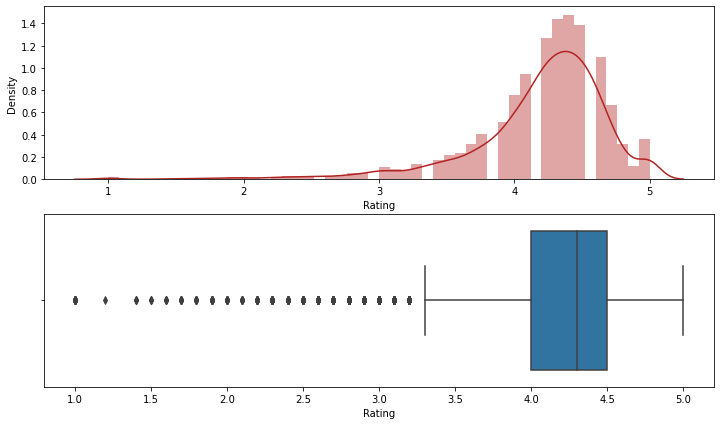

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(12,7))
sns.distplot(playstore_df['Rating'],color='firebrick',ax=ax[0])
sns.boxplot(x='Rating',data=playstore_df, ax=ax[1])

* The mean of the average ratings (excluding the NaN values) comes to be 4.2.

* The median of the entries (excluding the NaN values) in the 'Rating' column comes to be 4.3. From this we can say that 50% of the apps have an average rating of above 4.3, and the rest below 4.3.

* From the distplot visualizations, it is clear that the ratings are left skewed.
* We know that if the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.
* Hence we will impute the NaN values in the Rating column with its median.

In [ ]:
# Replacing the NaN values in the 'Rating' colunm with its median value
playstore_df['Rating'].fillna(value=median_rating,inplace=True)

# **Handling duplicates values and Manipulating dataset:** 





### **1). Changing the datatype of the Last Updated column from string to datetime.**

In [ ]:
# Pandas to_datetime() function applied to the values in the last updated column helps to convert string Date time into Python Date time object.
playstore_df["Last Updated"] = pd.to_datetime(playstore_df['Last Updated'])
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


### **2). Converting the values in the Install column from string datatype to integer datatype.**

In [ ]:
# Checking the contents of the 'Installs' column
playstore_df['Installs'].value_counts()

1,000,000+        1578
10,000,000+       1252
100,000+          1169
10,000+           1052
1,000+             905
5,000,000+         752
100+               718
500,000+           538
50,000+            478
5,000+             476
100,000,000+       409
10+                385
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

To convert all the values in the **Installs** column from string datatype to integer datatype, we must first drop the '+' symbol from all the entries if present and then we can change its datatype.

Applying the **convert_plus** function to convert the values in the **Installs** column from string datatype to float datatype.

In [ ]:
# Creating a function convert_plus which drops the '+' symbol if it is present and returns the output which is of integer datatype.

def convert_plus(val):
  '''
  This function drops the + symbol if present and returns the value with int datatype.
  '''
  if '+' and ',' in val:
    new = int(val[:-1].replace(',',''))
    return new
  elif '+' in val:
    new1 = int(val[:-1])
    return new1
  else:
    return int(val)

In [ ]:
# The drop_plus funtion applied to the main dataframe

playstore_df['Installs'] = playstore_df['Installs'].apply(lambda x: convert_plus(x))
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


he resultant values in the **Installs** column are of the integer datatype, and it represents the least number of times a particular app has been installed.

**Installs** = 0 indicates that that particular app has not been installed by anyone yet.

**Installs** = 1 indicates that the particular app has been installed by atleast one user.

**Installs** = 1000000 indicates that the particular app has been installed by atleast one million users. So on and so forth.

We have successfully converted the datatype of values in the Installs column from string to int.

### **3). Converting the datatype of values in theReviewscolumn from string to int.**

In [ ]:
# Converting the datatype of the values in the reviews column from string to int
playstore_df['Reviews'] = playstore_df['Reviews'].astype(int)
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
playstore_df.describe()

,Rating,Reviews,Installs
count,10830.000000,1.083000e+04,1.083000e+04
mean,4.206519,4.445607e+05,1.547847e+07
std,0.480446,2.929081e+06,8.506734e+07
min,1.000000,0.000000e+00,0.000000e+00
25%,4.100000,3.800000e+01,5.000000e+03
50%,4.300000,2.099500e+03,1.000000e+05
75%,4.500000,5.481300e+04,5.000000e+06
max,5.000000,7.815831e+07,1.000000e+09


We have successfully converted the datatype of the values in the Reviews column from string to int.

Now that we have handled the errors and NaN values in the playstoredata.csv file, lets do the same for the userreviews.csv file.



### **4). Converting the values in the Size column to a same unit of measure(MB).**

In [ ]:
playstore_df['Size'].value_counts()

Varies with device    1695
11M                    197
12M                    196
14M                    193
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: Size, Length: 457, dtype: int64

We can see that the values in the Size column contains data with different units. 'M' stands for MB and 'k' stands for KB. To easily analyse this column, it is necessary to convert all the values to a single unit. In this case, we will convert all the units to MB.

We know that 1MB = 1024KB, to convert KB to MB, we must divide all the values which are in KB by 1024.

In [ ]:
# Defining a function to convert all the entries in KB to MB and then converting them to float datatype.

def convert_kb_to_mb(val):
  '''
  This function converts all the valid entries in KB to MB and returns the result in float datatype.
  '''
  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 4)
    else:
      return val
  except:
    return val

Applying the kb_to_mb function to convert the values in the Size column to a single unit of measure (MB) and the datatype from string to float.

In [ ]:
# The kb_to_mb funtion applied to the size column
playstore_df['Size'] = playstore_df['Size'].apply(lambda x: convert_kb_to_mb(x))
playstore_df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
playstore_df['Size'] = playstore_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
playstore_df['Size'] = playstore_df['Size'].apply(lambda x: float(x))

A vast majority of the entries in the Size column contain the entry Varies with device. Since this entry cannot be used for analysis lets see if it can be imputed with the mean or median value of the entries in this column.

In [ ]:
# Finding max, min, mean, and median in the Size column excluding the 'Varies with device' values.

max_size = playstore_df[playstore_df['Size'] != 'Varies with device']['Size'].max()

min_size = playstore_df[playstore_df['Size'] != 'Varies with device']['Size'].min()

mean_size = round(playstore_df[playstore_df['Size'] != 'Varies with device']['Size'].mean(),4)

median_size = playstore_df[playstore_df['Size'] != 'Varies with device']['Size'].median()

[max_size, min_size, mean_size, median_size]

[100.0, 0.0083, 21.5346, 13.0]

**Visualization of distribution of `Size` using displot and detecting the outliers through boxplot.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


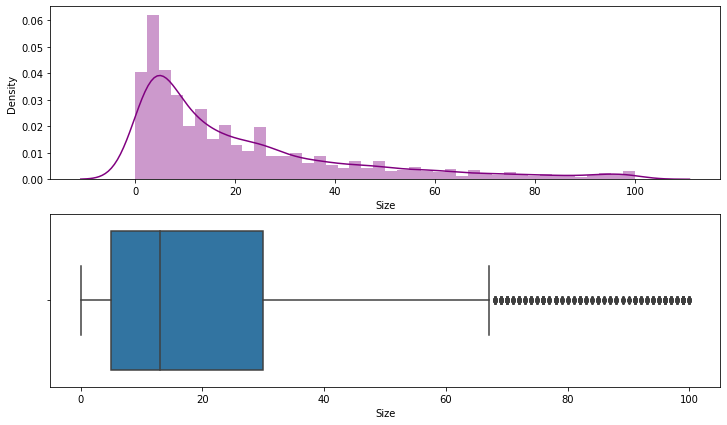

In [ ]:
# Distplot
fig, ax = plt.subplots(2,1, figsize=(12,7))
sns.distplot(playstore_df[playstore_df['Size'] != 'Varies with device']['Size'], color='purple', ax=ax[0])
sns.boxplot(x='Size',data=playstore_df, ax=ax[1])

*  It is clear from the visualizations that the data in the **Size** column is skewed towards the right.
*  Also, we see that a vast majority of the entries in this column are of the value **Varies with device**, replacing this with any central tendency value (mean or median) may give incorrect visualizations and results. Hence these values are left as it is.

*  We have successfully converted all the valid entries in the **Size** column to a single unit of measure (MB) and the datatype from string to float.

### **5). Changing the datatype of the Price column from string to float.**


In [ ]:
playstore_df['Price'].value_counts()

0         10033
$0.99       146
$2.99       129
$1.99        73
$4.99        72
          ...  
$19.90        1
$1.75         1
$14.00        1
$4.85         1
$1.04         1
Name: Price, Length: 92, dtype: int64

To convert this column from string to float, we must first drop the $ symbol from the all the values. Then we can assign float datatype to those values.

Applying the **drop_dollar** function to convert the values in the **Price** column from string datatype to float datatype.

In [ ]:
# Creating a function drop-dollar which dropps the $ symbol if it is present and returns the output which is of float datatype.
def convert_dollar(val):
  '''
  This funtion drops the $ symbol if present and returns the value with float datatype.
  '''
  if '$' in val:
    return float(val[1:])
  else:
    return float(val)

In [ ]:
# The drop_dollar funtion applied to the price column
playstore_df['Price']=playstore_df['Price'].apply(lambda x: convert_dollar(x))
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
playstore_df[playstore_df['Price']!=0].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,NaN,100000,Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up


We have successfully converted the datatype of values in the Price column from string to float.

### **6).Handling the duplicates in the App column**

In [ ]:
# Handling the error values in the Play store data
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
playstore_df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
8 Ball Pool                                           7
ESPN                                                  7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9649, dtype: int64

In [ ]:
# Inspecting the duplicates values.
playstore_df[playstore_df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up


In [ ]:
playstore_df[playstore_df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,NaN,10000000,Free,0.0,Everyone,Productivity,2018-04-06,Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,NaN,1000000,Free,0.0,Everyone,Productivity,2018-08-06,Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,NaN,100000000,Free,0.0,Everyone,Productivity,2018-06-27,Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86.0,10000,Free,0.0,Everyone,Medical,2018-06-01,0.6.88,5.0 and up


In [ ]:
# dropping duplicates from the 'App' column.
playstore_df.drop_duplicates(subset = 'App', inplace = True)
playstore_df.shape

(9649, 13)

In [ ]:
# Checking whether the duplicates in the 'App' column are taken care of or not
playstore_df[playstore_df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up


We have successfully handled all the duplicate values in the App column. The resultant number of rows after droping the duplicate rows in the app column come out to be 9649.

# **Data Exploration--Univariate & Bivariate Analysis**


Plot a pairwise plot between all the quantitative variables to look for any evident patterns or relationships between the features

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Pairwise Plot - Rating, Size, Installs, Reviews, Price')

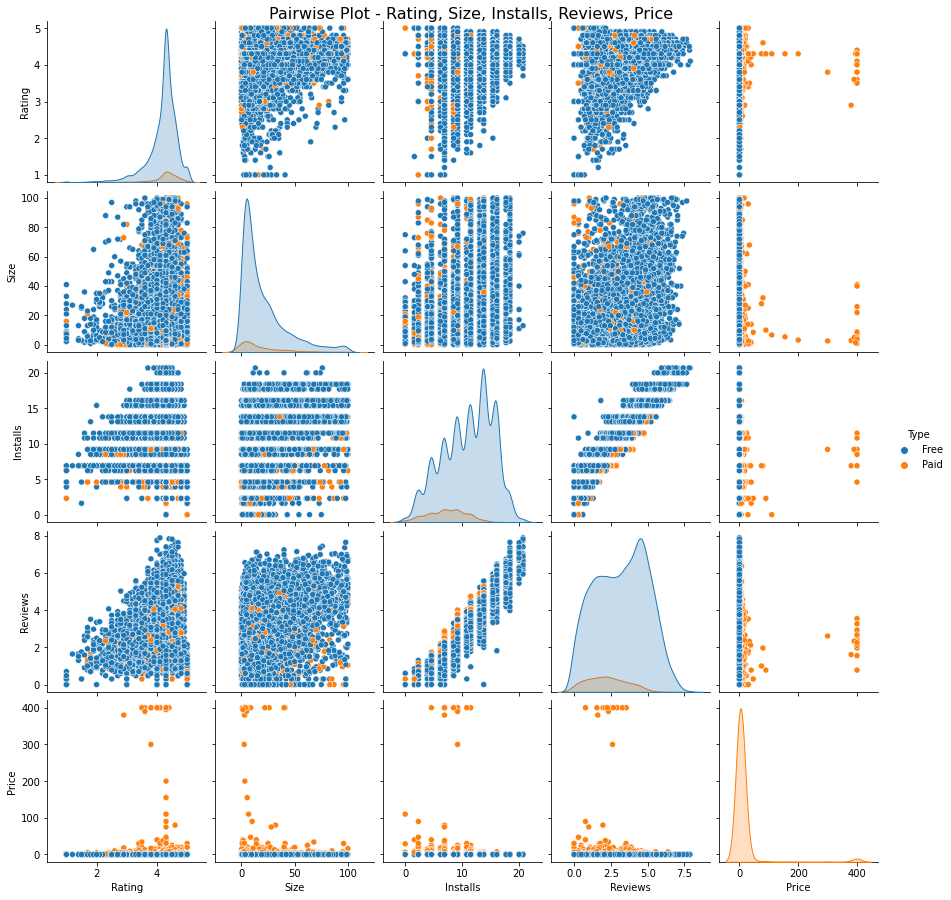

In [ ]:
Rating = playstore_df['Rating']
Size = playstore_df['Size']
Installs = playstore_df['Installs']
Reviews = playstore_df['Reviews']
Type = playstore_df['Type']
Price = playstore_df['Price']

p = sns.pairplot(pd.DataFrame(list(zip(Rating, Size, np.log(Installs), np.log10(Reviews), Price, Type)), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Price','Type']), hue='Type')
p.fig.suptitle("Pairwise Plot - Rating, Size, Installs, Reviews, Price",x=0.5, y=1.0, fontsize=16)

**FINDINGS**

* Most of the App are Free.
* Most of the Paid Apps have Rating around 4
* As the number of installation increases the number of reviews of the particaular app also increases. *Most of the Apps are light-weighted.

# **Let us see what insight we can have on the basis of Size of an app**

### **Size vs Rating**





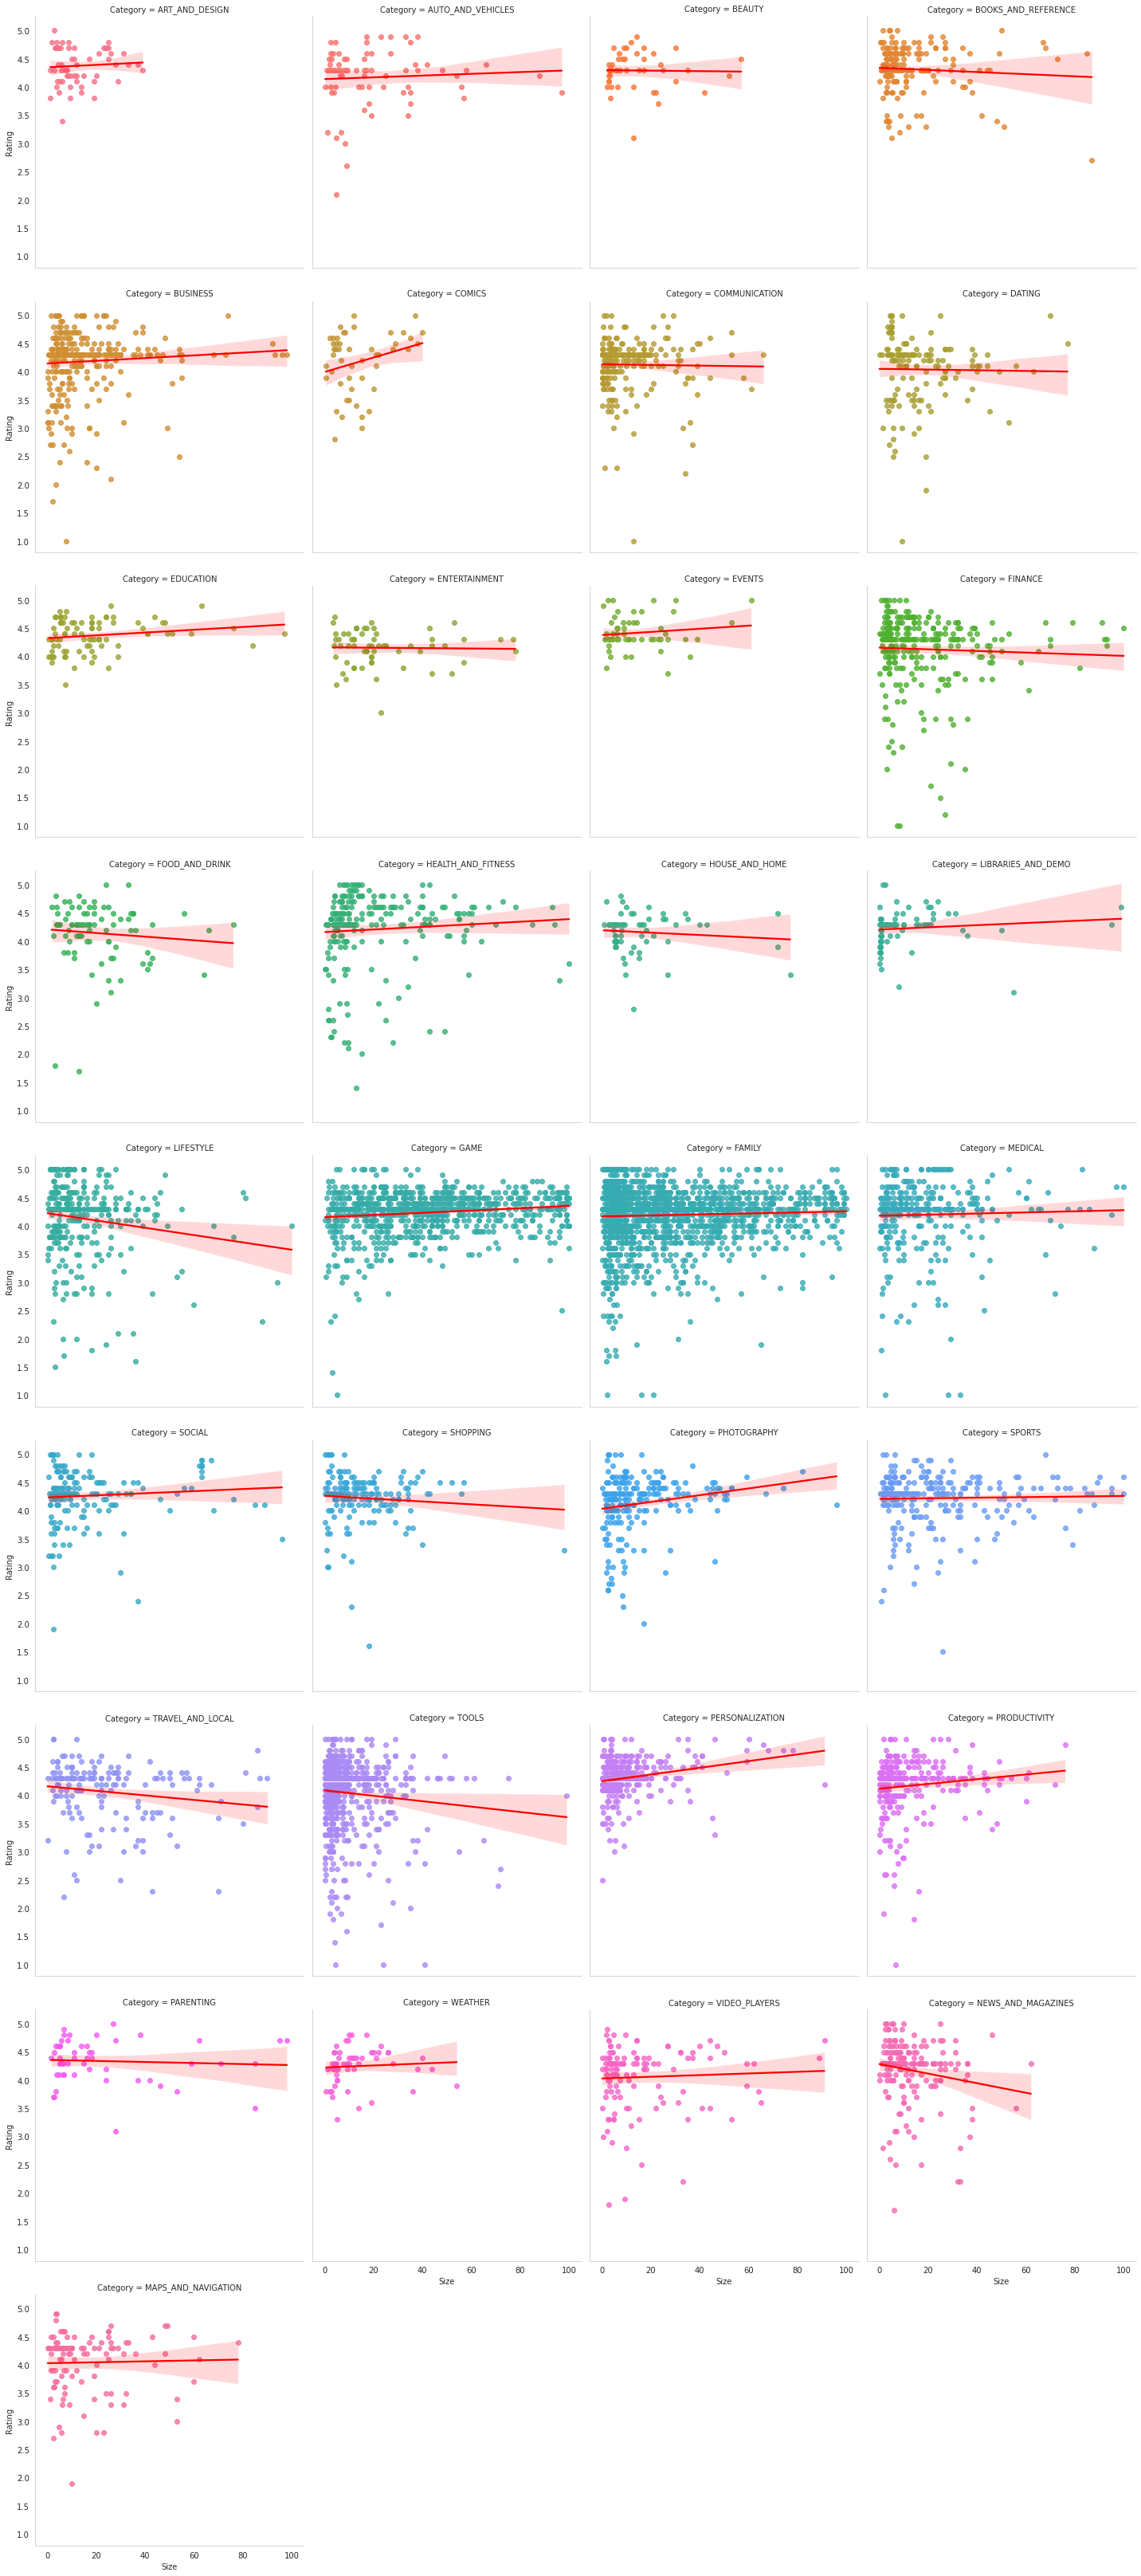

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lmplot(y='Rating',x='Size',data=playstore_df,col="Category", hue="Category",col_wrap=4,line_kws={'color': 'red'})

# **Exploring User_review dataframe**

In [ ]:
# Reading the userreviews.csv file
User_review_data_path = '/content/drive/MyDrive/User Reviews.csv'
User_review_data_df=pd.read_csv(User_review_data_path)

In [ ]:
# Checking the top 10 rows of the data

User_review_data_df.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [ ]:
# Checking shape and column in dataframe
print(User_review_data_df.columns)
rows=User_review_data_df.shape[0]
columns=User_review_data_df.shape[1]
print(f"the no of rows is {rows} and no of columns is {columns}")

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')
the no of rows is 64295 and no of columns is 5


In [ ]:
User_review_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


**Let us first define what information the columns contain based on our inspection.**

user_reviews dataframe has 64295 rows and 5 columns. The 5 columns are identified as follows:

* **App:** Contains the name of the app with a short description (optional).

* **Translated_Review:** It contains the English translation of the review dropped by the user of the app.

* **Sentiment:** It gives the attitude/emotion of the writer. It can be ‘Positive’, ‘Negative’, or ‘Neutral’.

* **Sentiment_Polarity:** It gives the polarity of the review. Its range is [-1,1], where 1 means ‘Positive statement’ and -1 means a ‘Negative statement’.

* **Sentiment_Subjectivity:** This value gives how close a reviewers opinion is to the opinion of the general public. Its range is [0,1]. Higher the subjectivity, closer is the reviewers opinion to the opinion of the general public, and lower subjectivity indicates the review is more of a factual information.

In [ ]:
def Urinfo():
  temp1=pd.DataFrame(index=User_review_data_df.columns)
  temp1["datatype"]=User_review_data_df.dtypes
  temp1["not null values"]=User_review_data_df.count()
  temp1["null value"]=User_review_data_df.isnull().sum()
  temp1["% of the null value"]=User_review_data_df.isnull().mean().round(4)*100
  temp1["unique count"]=User_review_data_df.nunique()
  return temp1
Urinfo()

,datatype,not null values,null value,% of the null value,unique count
App,object,64295,0,0.00,1074
Translated_Review,object,37427,26868,41.79,27994
Sentiment,object,37432,26863,41.78,3
Sentiment_Polarity,float64,37432,26863,41.78,5410
Sentiment_Subjectivity,float64,37432,26863,41.78,4474


**Findings**

The number of null values are:

* **Translated_Review** has 26868 null values which contributes **41.79%** of the data.

* **Sentiment** has 26863 null values which contributes **41.78** of the data.

* **Sentiment_Polarity** has 26863 null values which contributes **41.78%** of the data.

* **Sentiment_Subjectivity** has 26863 null values which contributes **41.78% **of the data.

# **Handling the error and NaN values in the User reviews**

In [ ]:
# Finding the total no of NaN values in each column.
User_review_data_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
# checking the NaN values in the translated rview column
User_review_data_df[User_review_data_df['Translated_Review'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


There are a total of 26868 rows containing NaN values in the Translated_Review column.

We can say that the apps which do not have a review (NaN value insted) tend to have NaN values in the columns **Sentiment, Sentiment_Polarity, and Sentiment_Subjectivity** in the majority of the cases.

**Lets check if there are any exceptions.**

In [ ]:
# The rows corresponding to the NaN values in the translated_review column, where the rest of the columns are non null.
User_review_data_df[User_review_data_df['Translated_Review'].isnull() & User_review_data_df['Sentiment'].notna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


In the few exceptional cases where the values of remaining columns are non null for null values in the translated_Review column, there seems to be errors. This is because the Sentiment, sentiment ploarity and sentiment subjectivity of the review can be determined if and only if there is a corresponding review.

Hence these values are wrong and can be deleted altogather.

In [ ]:
# Deleting the rows containing NaN values
playstore_df = User_review_data_df.dropna()


In [ ]:
# The shape of the updated df
User_review_data_df.shape

(64295, 5)

There are a total of 37427 rows in the updated df.

Hence we have taken care of all the NaN values in the df.

Lets inspect the updated df



In [ ]:
# Inspecting the sentiment column
User_review_data_df['Sentiment'].value_counts()


Positive    23998
Negative     8271
Neutral      5163
Name: Sentiment, dtype: int64

The values in the **Sentiment_Polarity and Sentiment_Subjectivity** looks correct.

On the given datasets, we successfully developed a data pipeline. We can now examine this data flow and create user-friendly visuals. It is easy to compare different measures using the visualizations, and thus to draw implications from them.

# **Data Visualization on play store data:**

We have sucessfully cleaned the dirty data. Now we can perform some data visualization and come up with insights on the given datasets.

### **1). Correlation Heatmap**

In [ ]:
# Finding correlation between different columns in the play store data
playstore_df.corr()


,Sentiment_Polarity,Sentiment_Subjectivity
Sentiment_Polarity,1.000000,0.261587
Sentiment_Subjectivity,0.261587,1.000000


Text(0.5, 1.0, 'Corelation Heatmap for Playstore Data')

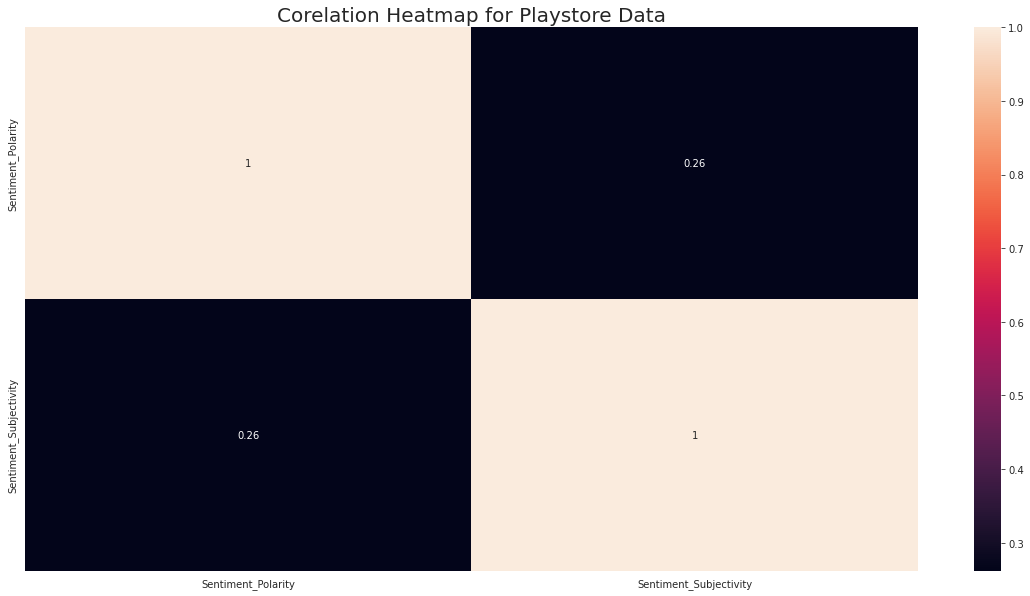

In [ ]:
# Heat map for play_store
plt.figure(figsize = (20,10))
sns.heatmap(playstore_df.corr(), annot= True)
plt.title('Corelation Heatmap for Playstore Data', size=20)

* The **Rating** is slightly positively correlated with theInstalls and Reviews column. This indicates that as the the average user rating increases, the app installs and number of reviews also increase.
* There is a strong positive correlation between the **Reviews and Installs** column. This is pretty much obvious. Higher the number of installs, higher is the user base, and higher are the total number of reviews dropped by the users.
* The **Price** slightly negatively correlated with the **Rating, Reviews, and Installs**. This means that as the prices of the app increases, the average rating, total number of reviews and Installs fall slightly.


### **Let us check if there is any co-relation in both the dataframes.**

In [ ]:
merged_df = pd.merge(playstore_df, playstore_df, on='App', how = "inner")

In [ ]:
def merged_dfinfo():
  temp = pd.DataFrame(index=merged_df.columns)
  temp['data_type'] = merged_df.dtypes
  temp["count of non null values"] = merged_df.count()
  temp['NaN values'] = merged_df.isnull().sum()
  temp['% NaN values'] =merged_df.isnull().mean()
  temp['unique_count'] = merged_df.nunique() 
  return temp
merged_dfinfo()

,data_type,count of non null values,NaN values,% NaN values,unique_count
App,object,2809377,0,0.0,865
Translated_Review_x,object,2809377,0,0.0,27994
Sentiment_x,object,2809377,0,0.0,3
Sentiment_Polarity_x,float64,2809377,0,0.0,5410
Sentiment_Subjectivity_x,float64,2809377,0,0.0,4474
Translated_Review_y,object,2809377,0,0.0,27994
Sentiment_y,object,2809377,0,0.0,3
Sentiment_Polarity_y,float64,2809377,0,0.0,5410
Sentiment_Subjectivity_y,float64,2809377,0,0.0,4474


In [ ]:
merged_df.corr()

,Sentiment_Polarity_x,Sentiment_Subjectivity_x,Sentiment_Polarity_y,Sentiment_Subjectivity_y
Sentiment_Polarity_x,1.000000,0.224033,0.164460,0.024306
Sentiment_Subjectivity_x,0.224033,1.000000,0.024306,0.045760
Sentiment_Polarity_y,0.164460,0.024306,1.000000,0.224033
Sentiment_Subjectivity_y,0.024306,0.045760,0.224033,1.000000


Text(0.5, 1.0, ' Heatmap for merged Dataframe')

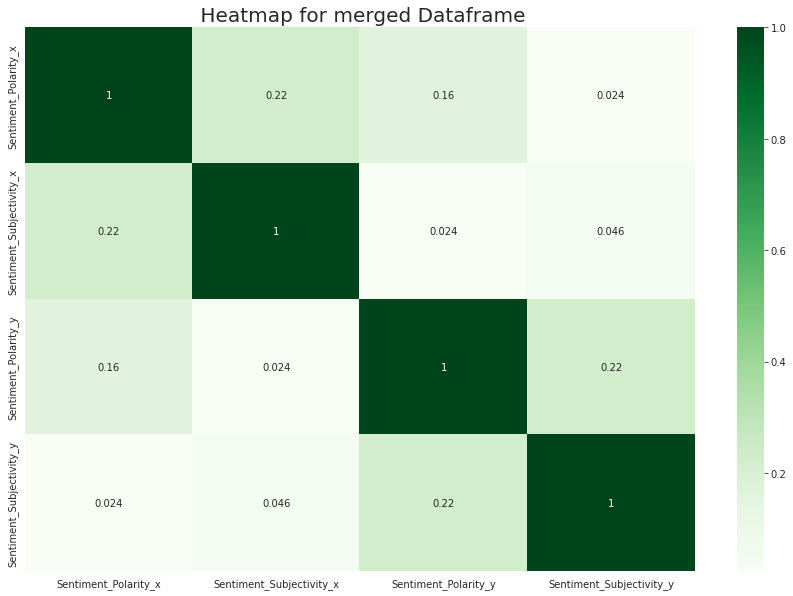

In [ ]:
# Correlation heatmap
# Heat Map for the merged data frame
plt.figure(figsize = (15,10))
sns.heatmap(merged_df.corr(), annot= True, cmap='Greens')
plt.title(' Heatmap for merged Dataframe', size=20)

### **2).Top categories on Google Playstore?**

In [ ]:
playstore_df.groupby("Category")["App"].count().sort_values(ascending= False)

In [ ]:
x = playstore_df['Category'].value_counts()
y = playstore_df['Category'].value_counts().index
x_list = []
y_list = []
for i in range(len(x)):
    x_list.append(x[i])
    y_list.append(y[i])

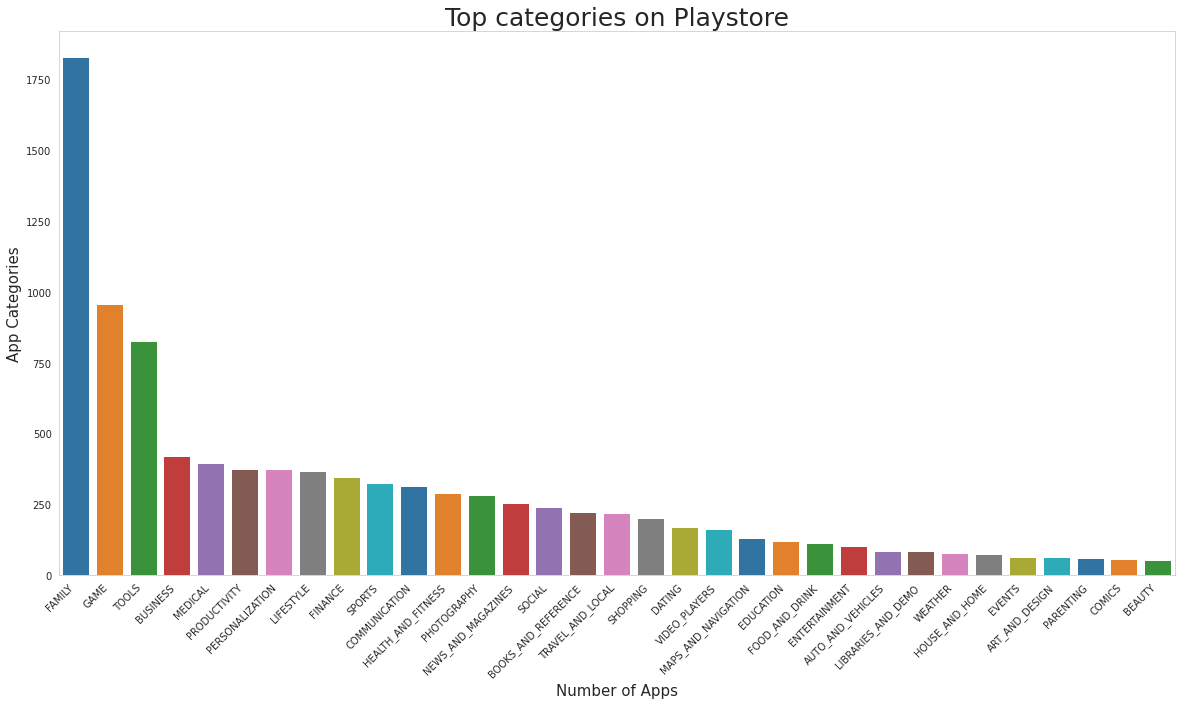

In [ ]:
#Number of apps belonging to each category in the playstore
plt.figure(figsize=(20,10))
plt.xlabel('Number of Apps', size=15)
plt.ylabel('App Categories', size=15)
graph = sns.barplot(y = x_list, x = y_list, palette= "tab10")
graph.set_title("Top categories on Playstore", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right',);

**Findings:**

So there are all total 33 categories in the dataset From the above output we can come to a conclusion that in playstore most of the apps are underFAMILY & GAME category and least are of EVENTS & BEAUTY Category.

In [ ]:
# Percentage of apps belonging to each category in the playstore
plt.figure(figsize=(18,18))
plt.pie(playstore_df.Category.value_counts(), labels=playstore_df.Category.value_counts().index, autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.50, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% of apps share in each Category', fontsize = 25)
plt.show()

### **3). What are the Top 10 installed apps in any category?**


In [ ]:
def findtop10incategory(str):
    str = str.upper()
    top10 = playstore_df[playstore_df['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(12)
    plt.figure(figsize=(18,9), dpi=100)
    plt.title('Top 10 Installed Apps',size = 25)  
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs, palette= "icefire")
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right')

In [ ]:
findtop10incategory('GAME')

**Findings:**

From the above graph we can see that in the Game category **Subway Surfers**,**Candy Crush Saga**, **Temple Run 2** has the highest installs. In the same way we by passing different category names to the function, we can get the top 10 installed apps.

### **4). Which category App's have most number of installs?**

In [ ]:
# total app installs in each category of the play store

a = playstore_df.groupby(['Category'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(20,15), color = 'c', )
plt.ylabel('Total app Installs', fontsize = 20)
plt.xlabel('App Categories', fontsize = 20)
plt.xticks()
plt.title('Total app installs in each category', fontsize = 20)

### **5). Top apps that are of free type.**

In [ ]:
# Creating a df for only free apps
 
free_df = playstore_df[playstore_df['Type'] == 'Free']

In [ ]:
# Creating a df for top free apps

top_free_df = free_df[free_df['Installs'] == free_df['Installs'].max()]
top10free_apps=top_free_df.nlargest(12, 'Installs', keep='first')
top10free_apps.head(12)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,NaN,1000000000,Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device
341,Hangouts,COMMUNICATION,4.0,3419249,NaN,1000000000,Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
865,Google Play Games,ENTERTAINMENT,4.3,7165362,NaN,1000000000,Free,0.0,Teen,Entertainment,2018-07-16,Varies with device,Varies with device
1654,Subway Surfers,GAME,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up
2544,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device


In [ ]:
# Top free apps

top_free_df['App']

152                            Google Play Books
335     Messenger – Text and Video Chat for Free
336                           WhatsApp Messenger
338                 Google Chrome: Fast & Secure
340                                        Gmail
341                                     Hangouts
391                Skype - free IM & video calls
865                            Google Play Games
1654                              Subway Surfers
2544                                    Facebook
2545                                   Instagram
2554                                     Google+
2808                               Google Photos
3117                   Maps - Navigate & Explore
3127                          Google Street View
3234                                      Google
3454                                Google Drive
3665                                     YouTube
3687                     Google Play Movies & TV
3736                                 Google News
Name: App, dtype: ob

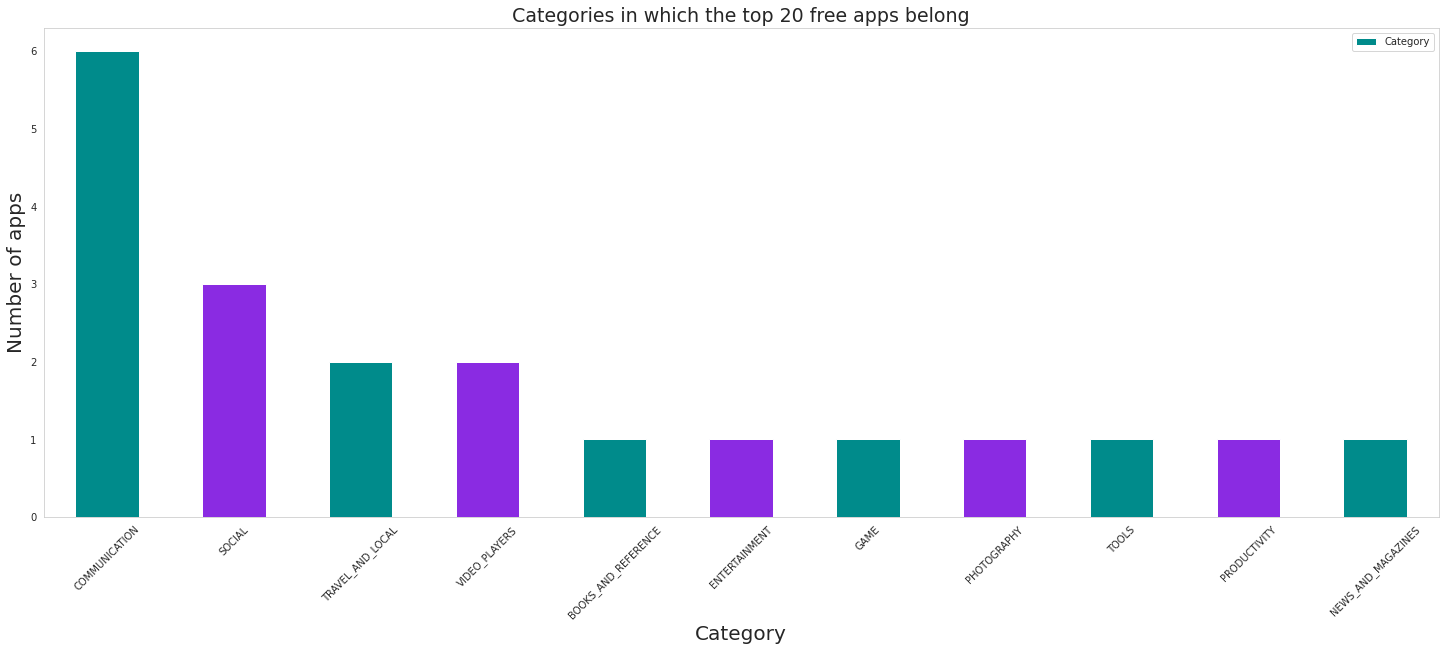

In [ ]:
# Categories in which the top 20 free apps belong to
top_free_df['Category'].value_counts().plot.bar(figsize=(25,9), color= ('darkcyan','blueviolet'))
plt.xlabel('Category', size=20)
plt.ylabel('Number of apps', size=20)
plt.title('Categories in which the top 20 free apps belong', size=19)
plt.xticks(rotation=45)
plt.legend()


### **6). Average rating of the apps**

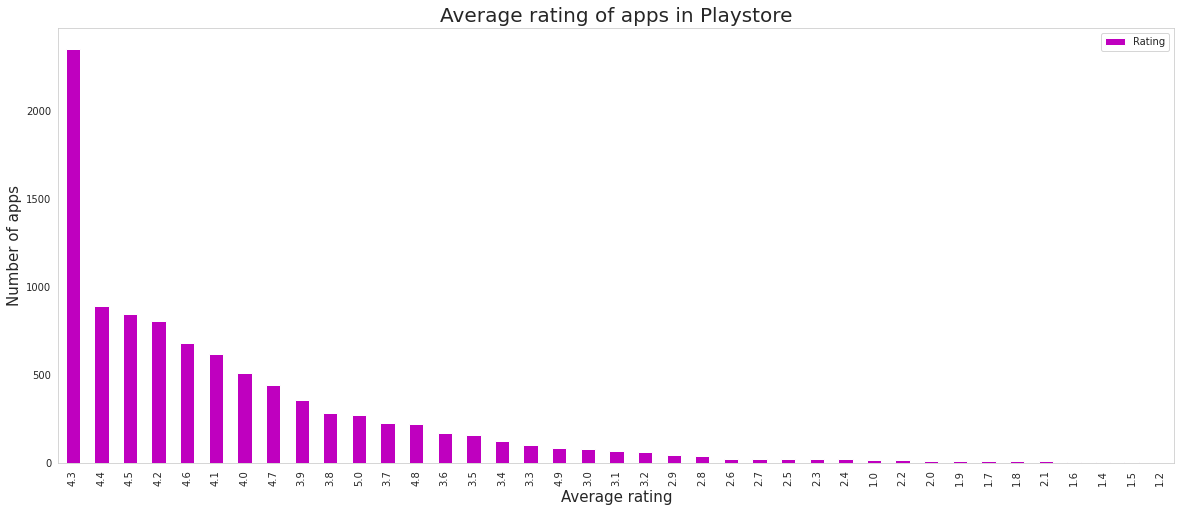

In [ ]:
# Average app ratings

playstore_df['Rating'].value_counts().plot.bar(figsize=(20,8), color = 'm' )
plt.xlabel('Average rating',fontsize = 15 )
plt.ylabel('Number of apps', fontsize = 15)
plt.title('Average rating of apps in Playstore', fontsize = 20)
plt.legend()

### **7). What is the ratio of number of Paid apps and Free apps?**


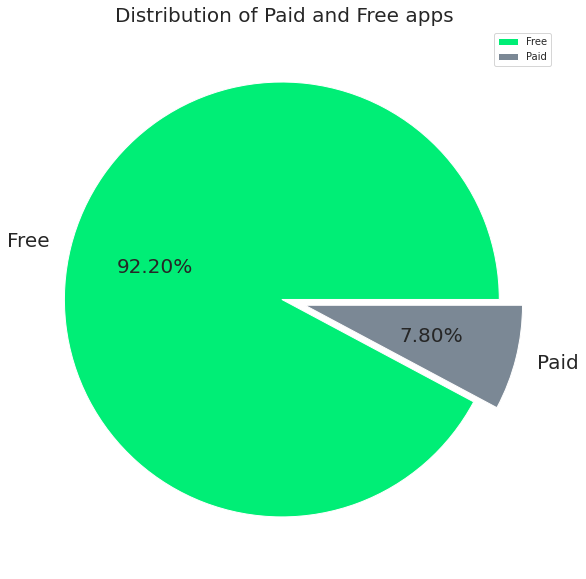

In [ ]:
data = playstore_df['Type'].value_counts() 
labels = ['Free', 'Paid']

# create pie chart
plt.figure(figsize=(10,10))
colors = ["#00EE76","#7B8895"]
explode=(0.01,0.1)
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 20})
plt.title('Distribution of Paid and Free apps',size=20,loc='center')
plt.legend()

### **8). Distribution of apps based on its size**

In [ ]:
# Values calculated earlier
[mean_size,median_size,max_size,min_size]

[21.5346, 13.0, 100.0, 0.0083]

* The size of an app in our database varies from 100 MB to 0.0083 MB. We can analyse the size of the apps if we can group them into certain intervals.

* We have already established that the data in the numeric values in the 'Size' column are skewed towards the left.

* Lets group the data in the size column as follows into intervals of 10 each:
(< 1 MB, 1-10, 10-20, 20-30, ..., 90-100, 'Varies with device')

**Lets create a function to create the size intervals**

In [ ]:
# Function to group the apps based on its size in MB

def size_apps(var):
  '''
  This function groups the size of an app 
  between ~0 to 100 MB into certain intervals.
  '''
  try:
    if var < 1:
      return 'Below 1'
    elif var >= 1 and var <10:
      return '1-10'
    elif var >= 10 and var <20:
      return '10-20'
    elif var >= 20 and var <30:
      return '20-30'
    elif var >= 30 and var <40:
      return '30-40'
    elif var >= 40 and var <50:
      return '40-50'
    elif var >= 50 and var <60:
      return '50-60'
    elif var >= 60 and var <70:
      return '60-70'
    elif var >= 70 and var <80:
      return '70-80'
    elif var >= 80 and var <90:
      return '80-90'
    else:
      return '90 and above'
  except:
    return var



Lets apply the **size_group** function on the Size column and store the results in a new column named **Size** group.

In [ ]:
playstore_df['size_group']=playstore_df['Size'].apply(lambda x : size_apps(x))
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_group
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,10-20
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,10-20
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1-10
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,20-30
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,1-10


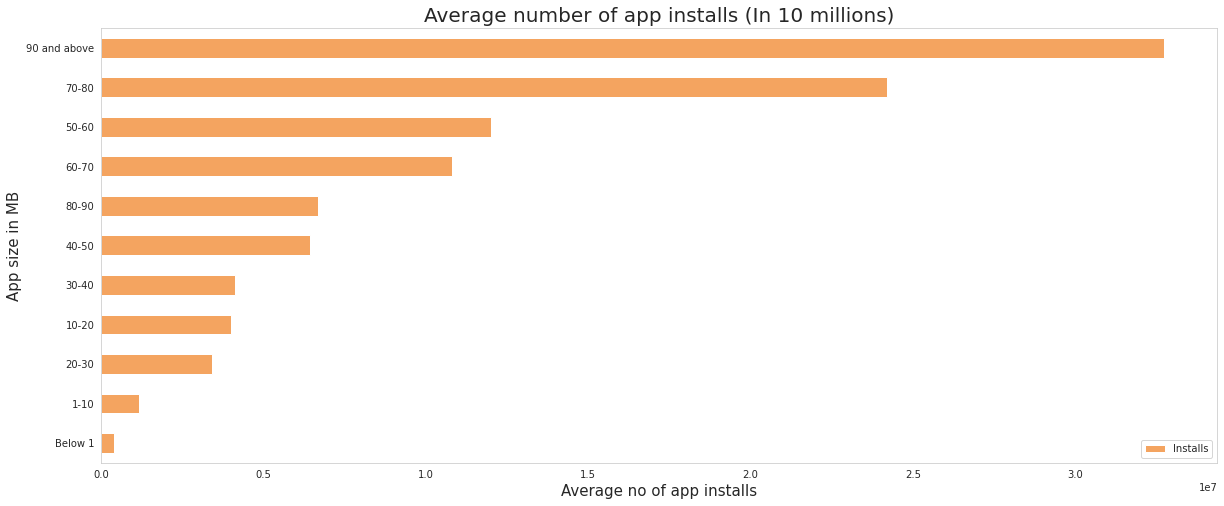

In [ ]:
# average number of app installs in each category

playstore_df.groupby('size_group')['Installs'].mean().sort_values(ascending= False).plot.barh(figsize=(20,8),color='sandybrown').invert_yaxis()
plt.title("Average number of app installs (In 10 millions)", size=20)
plt.ylabel('App size in MB', size=15)
plt.xlabel('Average no of app installs',  size=15)
plt.legend()

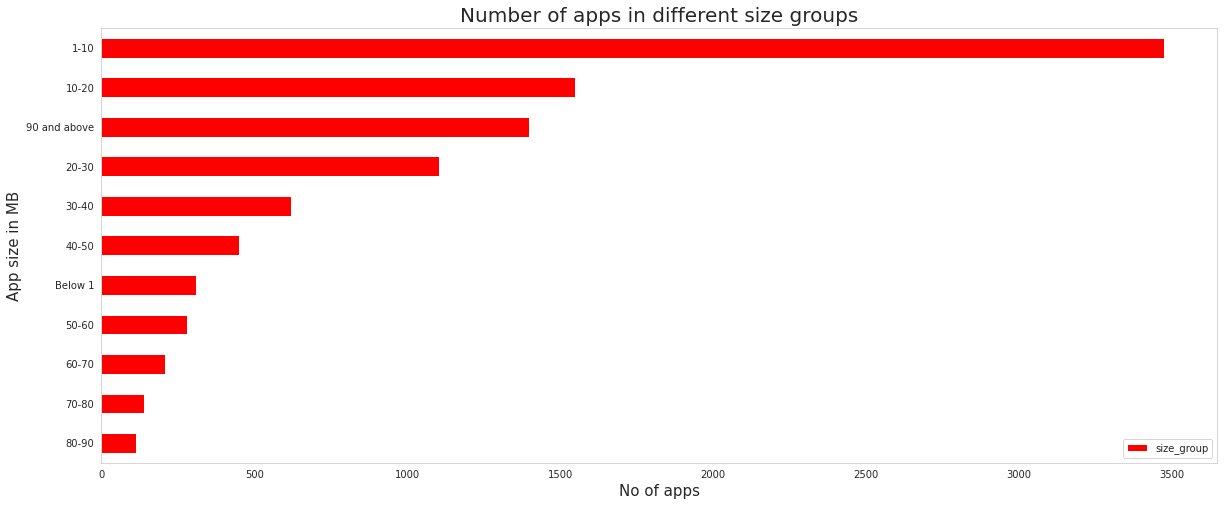

In [ ]:
# no of apps belonging to each size group
playstore_df['size_group'].value_counts().plot.barh(figsize=(20,8),color='r').invert_yaxis()
plt.title("Number of apps in different size groups", size=20)
plt.ylabel('App size in MB', size=15)
plt.xlabel('No of apps', size=15)
plt.legend()

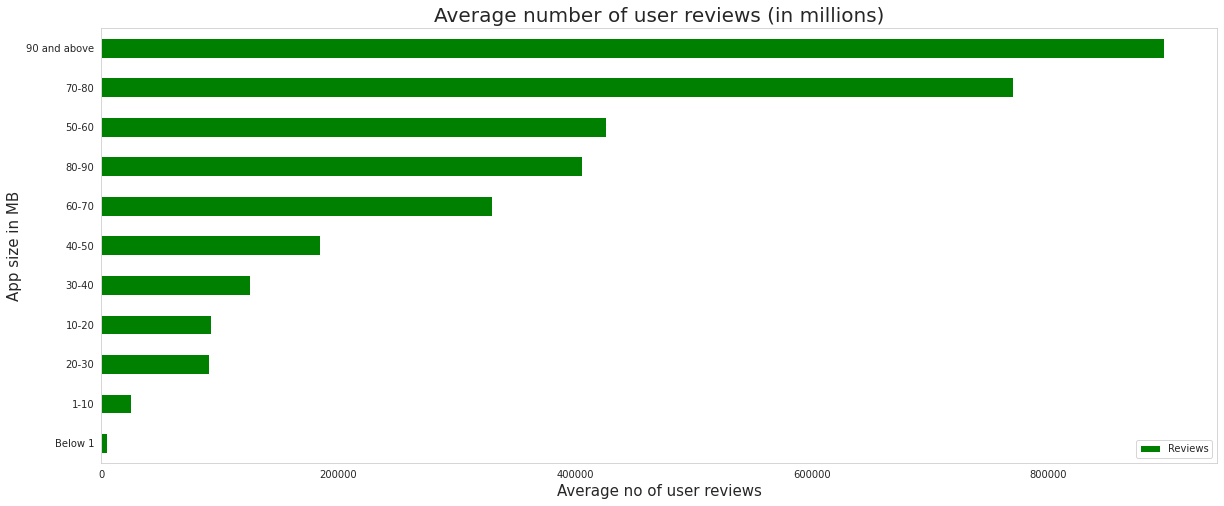

In [ ]:
# average no of user reviews in each size group
playstore_df.groupby('size_group')['Reviews'].mean().sort_values().plot.barh(figsize=(20,8), color = 'green')
plt.title("Average number of user reviews (in millions)", size=20)
plt.xlabel('Average no of user reviews', size=15)
plt.ylabel('App size in MB', size=15)
plt.legend()

* The apps which are smaller in size on average have lower no of app installs and user reviews.

* The sizes of the majority of the apps range in between 1 and 20 MB.

* There are a good number of apps whose size varies with the device.



### **9). Android version based on each category**

Now I am going to group it to 1 till 8 version of android. Change the null value to 1.0.

In [ ]:
playstore_df['Android Ver'].replace(to_replace=['4.4W and up','Varies with device'], value=['4.4','1.0'],inplace=True)
playstore_df['Android Ver'].replace({k: '1.0' for k in ['1.0','1.0 and up','1.5 and up','1.6 and up']},inplace=True)
playstore_df['Android Ver'].replace({k: '2.0' for k in ['2.0 and up','2.0.1 and up','2.1 and up','2.2 and up','2.2 - 7.1.1','2.3 and up','2.3.3 and up']},inplace=True)
playstore_df['Android Ver'].replace({k: '3.0' for k in ['3.0 and up','3.1 and up','3.2 and up']},inplace=True)
playstore_df['Android Ver'].replace({k: '4.0' for k in ['4.0 and up','4.0.3 and up','4.0.3 - 7.1.1','4.1 and up','4.1 - 7.1.1','4.2 and up','4.3 and up','4.4','4.4 and up']},inplace=True)
playstore_df['Android Ver'].replace({k: '5.0' for k in ['5.0 - 6.0','5.0 - 7.1.1','5.0 - 8.0','5.0 and up','5.1 and up']},inplace=True)
playstore_df['Android Ver'].replace({k: '6.0' for k in ['6.0 and up']},inplace=True)
playstore_df['Android Ver'].replace({k: '7.0' for k in ['7.0 - 7.1.1','7.0 and up','7.1 and up']},inplace=True)
playstore_df['Android Ver'].replace({k: '8.0' for k in ['8.0 and up']},inplace=True)
playstore_df['Android Ver'].fillna('1.0', inplace=True)

Category        Android Ver
ART_AND_DESIGN  4.0            50
                2.0             9
                3.0             2
                1.0             1
                5.0             1
                               ..
WEATHER         4.0            38
                1.0            23
                2.0            10
                5.0             7
                3.0             1
Name: Android Ver, Length: 199, dtype: int64


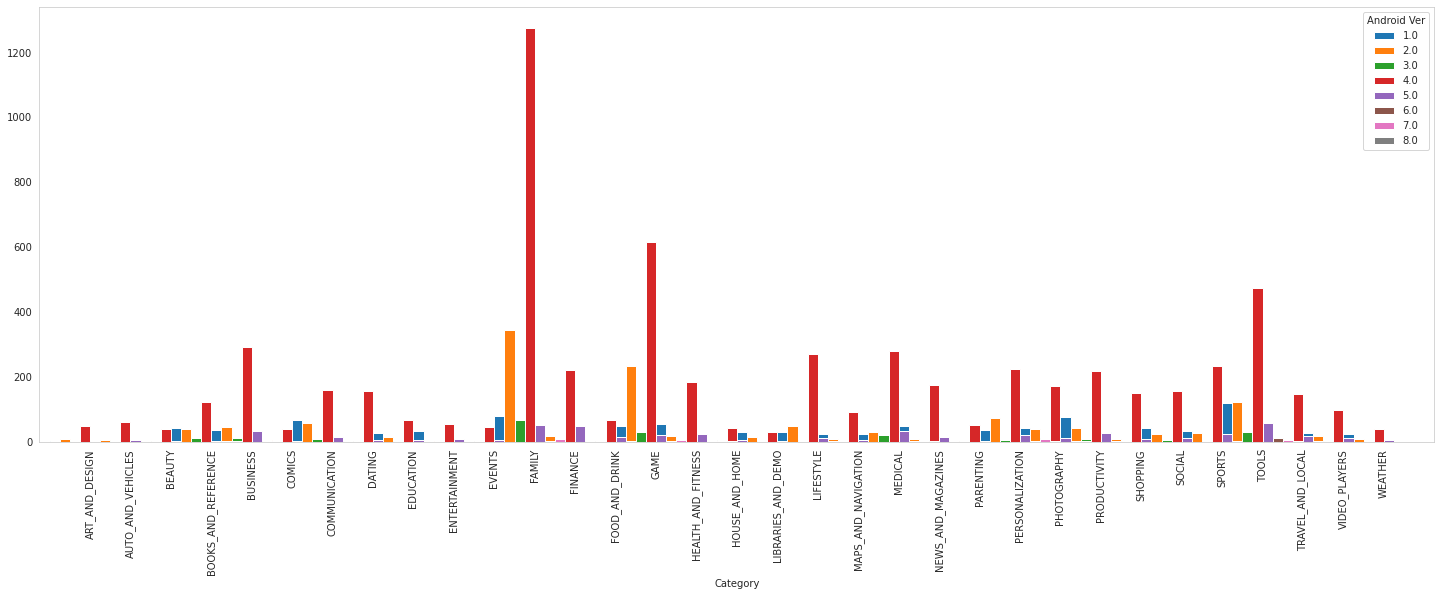

In [ ]:
print(playstore_df.groupby('Category')['Android Ver'].value_counts())
Type_cat = playstore_df.groupby('Category')['Android Ver'].value_counts().unstack().plot.bar(figsize=(25,8), width=2)
plt.xticks()
plt.show()

**Findings:**

It is clearly evident from the above plot that majority of the apps are working on **Android_Ver 4.0** and **up.**

### **10). Top apps that are of paid type.**

In [ ]:
# Creating a df containing only paid apps
app_paid_df=playstore_df[playstore_df['Type']=='Paid']

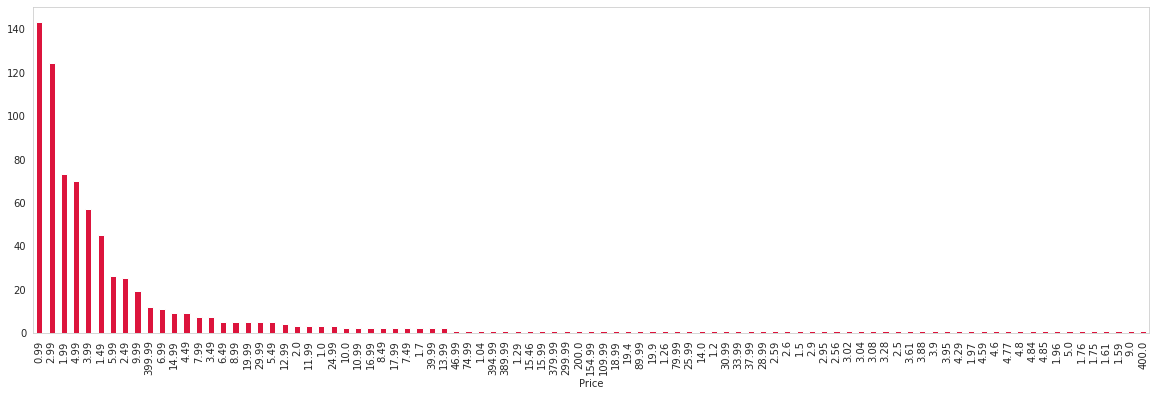

In [ ]:
# Number of apps that can be installed at a particular price 

app_paid_df.groupby('Price')['App'].count().sort_values(ascending= False).plot.bar(figsize = (20,6), color = 'crimson')

* The paid apps charge the users a certain amount to download and install the app. This amount varies from one app to another.
* There are a lot of apps that charge a small amount whereas some apps charge a larger amount. In this case the price to download an app varies from USD 0.99 to USD 400.
* In order to select the top paid apps, it won't be fair to look just into the numer of installs. This is because the apps that charge a lower installation fee will be installed by more number of people in general.
* Here a better way to determine the top apps in the paid category is by finding the revenue it generated through app installs.
* This is given by:

Revenue generated through installs = (Number of installs)x(Price to install the app)

**Let's define a new column Revenue in paid_df which gives the revenue generated by the app through installs alone**

In [ ]:
# Creatng a new column 'Revenue' in paid_df
app_paid_df['Revenue'] = app_paid_df['Installs']*app_paid_df['Price']
app_paid_df.head(8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_group,Revenue
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8000,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,1-10,499000.0
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0000,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,30-40,499000.0
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,NaN,100000,Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up,90 and above,399000.0
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,NaN,10000,Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up,90 and above,39900.0
477,Calculator,DATING,2.6,57,6.2000,1000,Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up,1-10,6990.0
478,Truth or Dare Pro,DATING,4.3,0,20.0000,50,Paid,1.49,Teen,Dating,2017-09-01,1.0,4.0 and up,20-30,74.5
479,"Private Dating, Hide App- Blue for PrivacyHider",DATING,4.3,0,0.0176,100,Paid,2.99,Everyone,Dating,2017-07-25,1.0.1,4.0 and up,Below 1,299.0
480,Ad Blocker for SayHi,DATING,4.3,4,1.2000,100,Paid,3.99,Teen,Dating,2018-08-02,1.2,4.0.3 and up,1-10,399.0


In [ ]:
# Top 10 paid apps in the play store
top10_paid_apps=app_paid_df.nlargest(10, 'Revenue', keep='first')
top10_paid_apps['App']

2241                        Minecraft
5351                        I am rich
5356                I Am Rich Premium
4034                    Hitman Sniper
7417    Grand Theft Auto: San Andreas
2883              Facetune - For Free
5578          Sleep as Android Unlock
8804              DraStic DS Emulator
4367         I'm Rich - Trump Edition
4362                       💎 I'm rich
Name: App, dtype: object

In [ ]:
# Top app in the paid category

app_paid_df[app_paid_df['Revenue'] == app_paid_df['Revenue'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_group,Revenue
2241,Minecraft,FAMILY,4.5,2376564,NaN,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device,90 and above,69900000.0


In [ ]:
# Categories in which the top 10 paid apps belong to
top10_paid_apps['Category'].value_counts().plot.bar(figsize=(15,5), color= ["yellow", "red", "green", "blue", "purple"])
plt.xlabel('Category',size=12)
plt.ylabel('Number of apps',size=12)
plt.title('Categories in which the top 10 paid apps belong', size=15)
plt.xticks(rotation=0)
plt.legend()

NameError: ignored

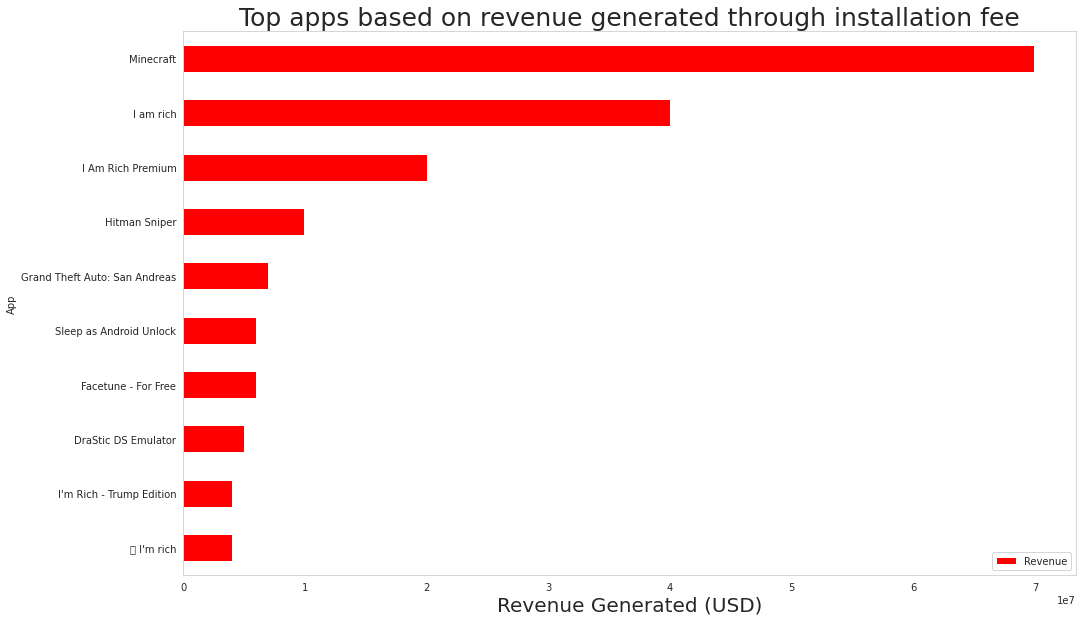

In [ ]:
# Top paid apps according to the revenue generated through installs alone
top10_paid_apps.groupby('App')['Revenue'].mean().sort_values(ascending= True).plot.barh(figsize=(16,10), color='red')
plt.xlabel('Revenue Generated (USD)', size=20)
plt.title('Top apps based on revenue generated through installation fee', size=25)
plt.legend()

### **11).  Which category of Apps from the Content Rating column are found more on playstore ?**

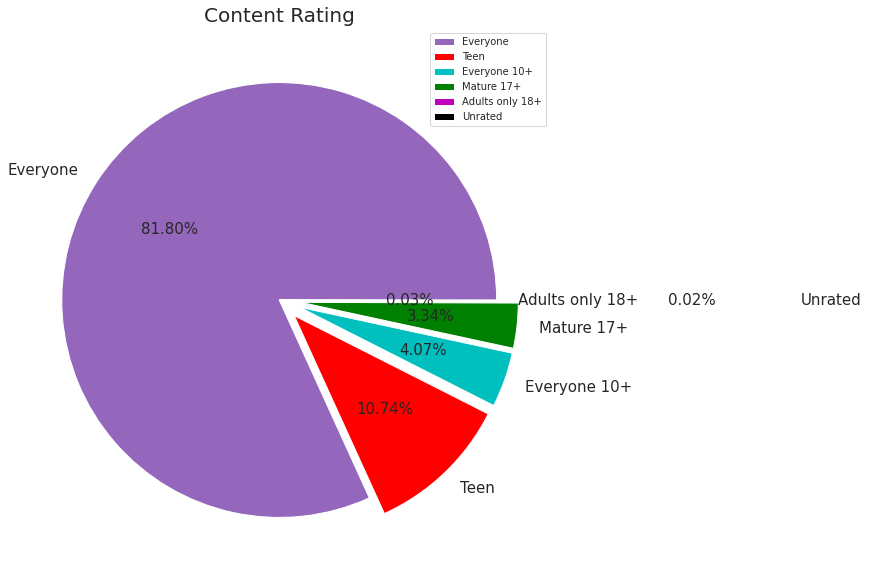

In [ ]:
# Content rating of the apps
data = playstore_df['Content Rating'].value_counts()
labels = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+','Adults only 18+', 'Unrated']

#create pie chart
plt.figure(figsize=(10,10))
explode=(0,0.1,0.1,0.1,0.0,1.3)
colors = ['C4', 'r', 'c', 'g', 'm', 'k']
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Content Rating',size=20,loc='center')
plt.legend()

# **Data Visualization on User Reviews:**

### **1). Is sentiment_subjectivity proportional to sentiment_polarity?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


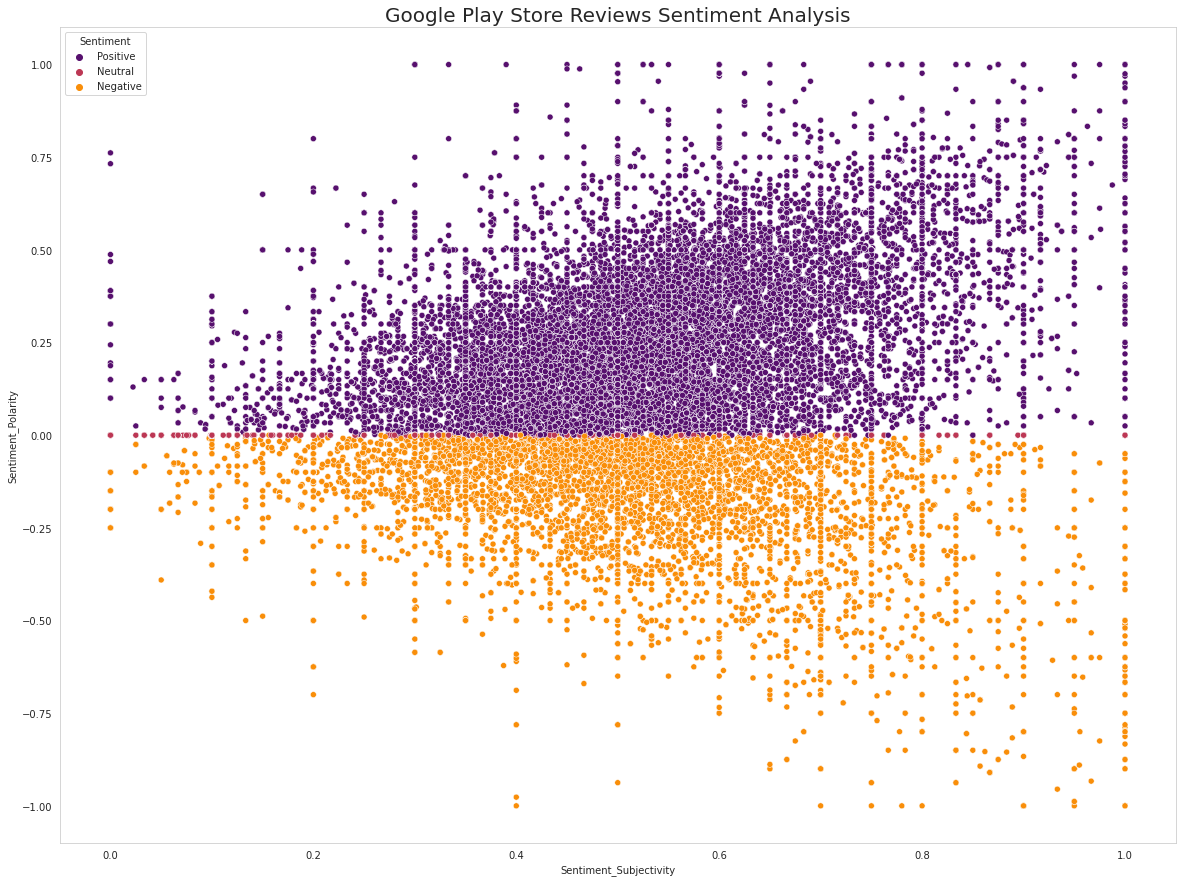

In [ ]:
# scatterplot of sentiment polarity and sentiment subjectivity
plt.figure(figsize=(20, 15))
sns.scatterplot(User_review_data_df['Sentiment_Subjectivity'], User_review_data_df['Sentiment_Polarity'],
                hue = User_review_data_df['Sentiment'], edgecolor='white', palette="inferno")
plt.title("Google Play Store Reviews Sentiment Analysis", fontsize=20)
plt.show()

### **2). Apps with the highest number of negative reviews.**

In [ ]:
n_User_review_data_df=User_review_data_df[User_review_data_df['Sentiment']=='Negative']
n_User_review_data_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200000,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200000,0.000000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
...,...,...,...,...,...
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


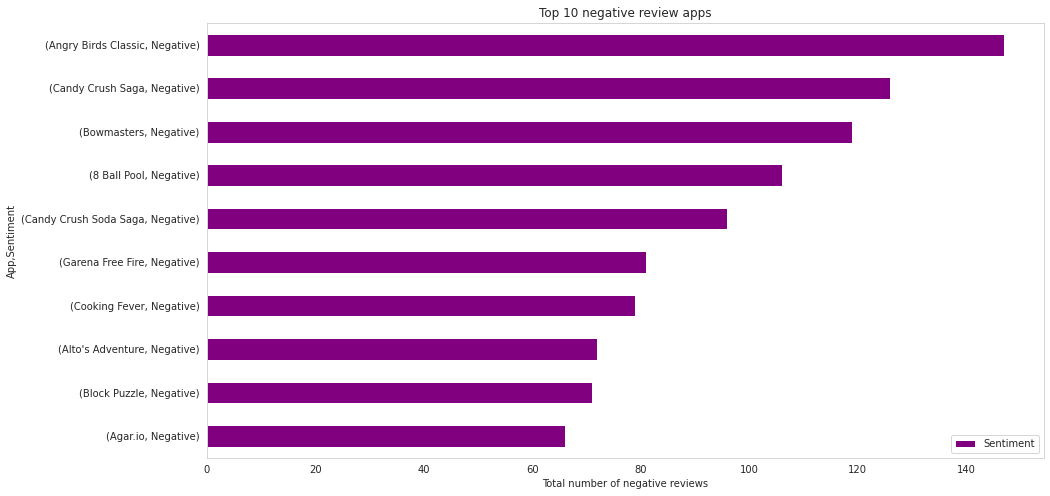

In [ ]:
n_User_review_data_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(15,8),color='purple').invert_yaxis()
plt.title("Top 10 negative review apps")
plt.xlabel('Total number of negative reviews')
plt.legend()

### **3). Percentage of Review Sentiments**

In [ ]:
# Basic inspection
User_review_data_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

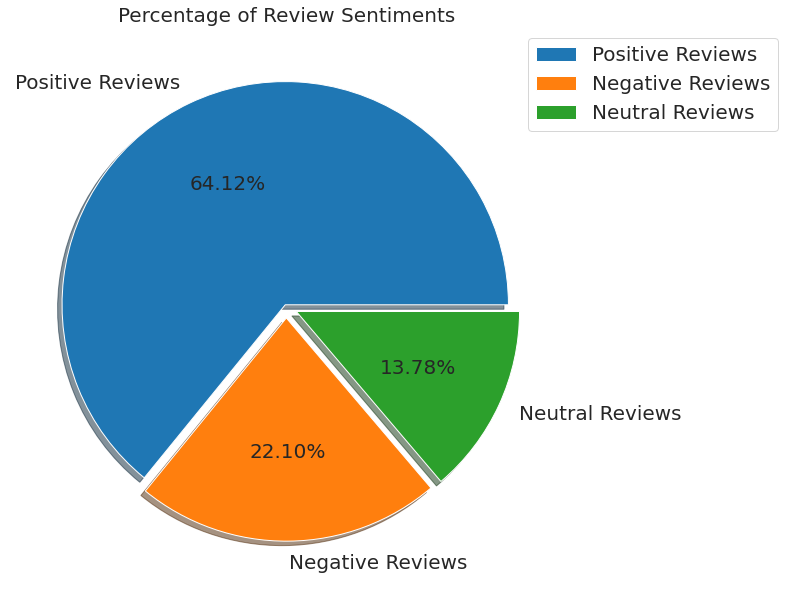

In [ ]:
import matplotlib
counts = list(User_review_data_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (10, 15)
plt.pie(counts, labels=labels, explode=[0.01, 0.05, 0.05], shadow=True, autopct="%.2f%%")
plt.title('Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend(bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.show()

### **4). Apps with the highest number of negative reviews.**

In [ ]:
n_User_review_data_df=User_review_data_df[User_review_data_df['Sentiment']=='Negative']
n_User_review_data_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200000,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200000,0.000000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
...,...,...,...,...,...
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


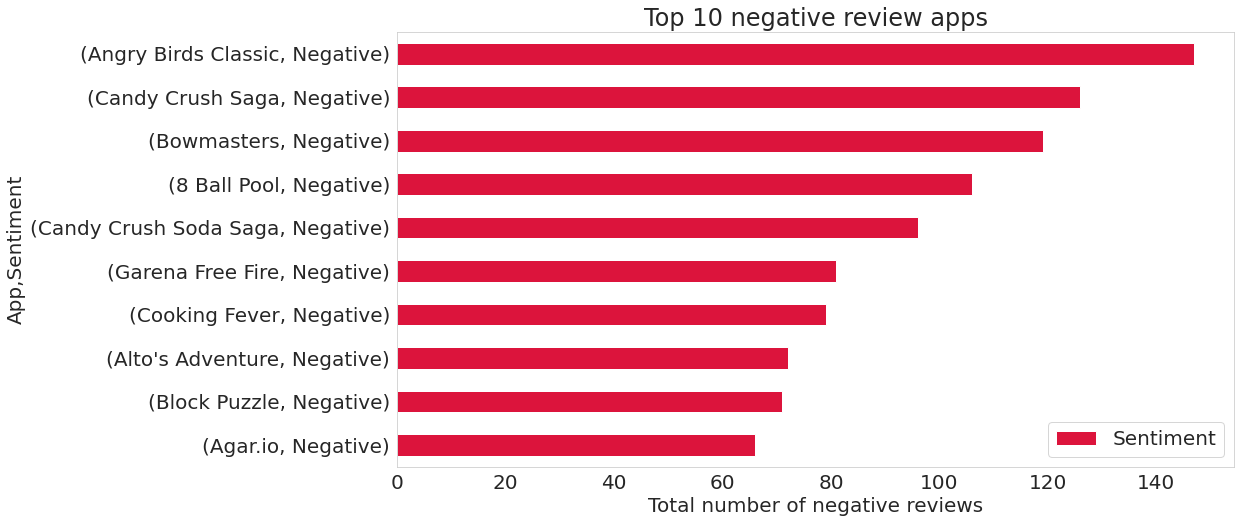

In [ ]:
n_User_review_data_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(15,8),color='crimson').invert_yaxis()
plt.title("Top 10 negative review apps")
plt.xlabel('Total number of negative reviews')
plt.legend()

# **How Content Rating affect over the App**



### **1). Free App content Rating**

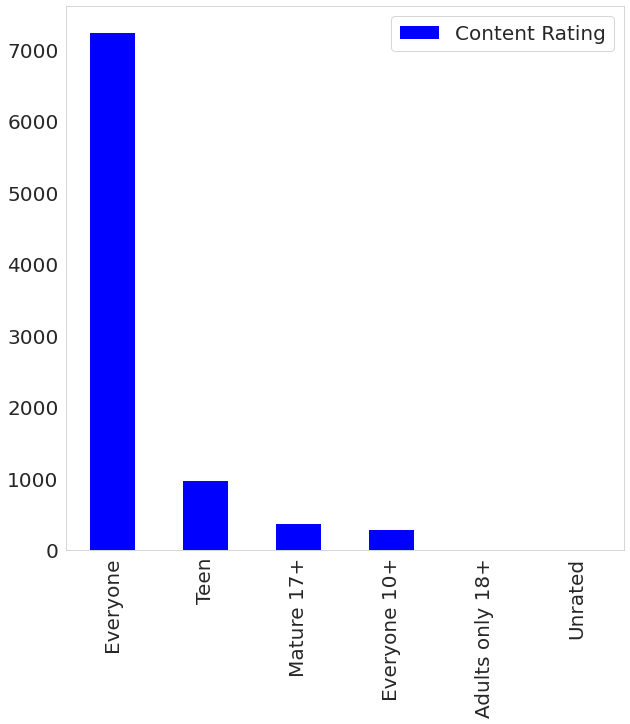

In [ ]:
free_df['Content Rating'].value_counts().plot.bar(figsize=(10,10),color='blue')
plt.legend()

### **2). Does Last Update date has an effects on rating?**

In [ ]:
print(playstore_df['Last Updated'].head())
#fetch update year from date
playstore_df["Update year"] = playstore_df["Last Updated"].apply(lambda x: x.strftime('%Y')).astype('int64') 

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]


Text(0.5, 1.0, 'Update Year VS Rating')

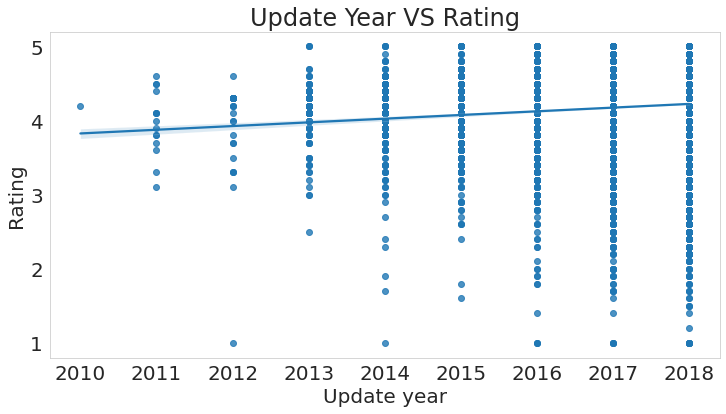

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.regplot(x="Update year", y="Rating", data=playstore_df)
plt.title("Update Year VS Rating")

### **3). Paid App Content Rating**

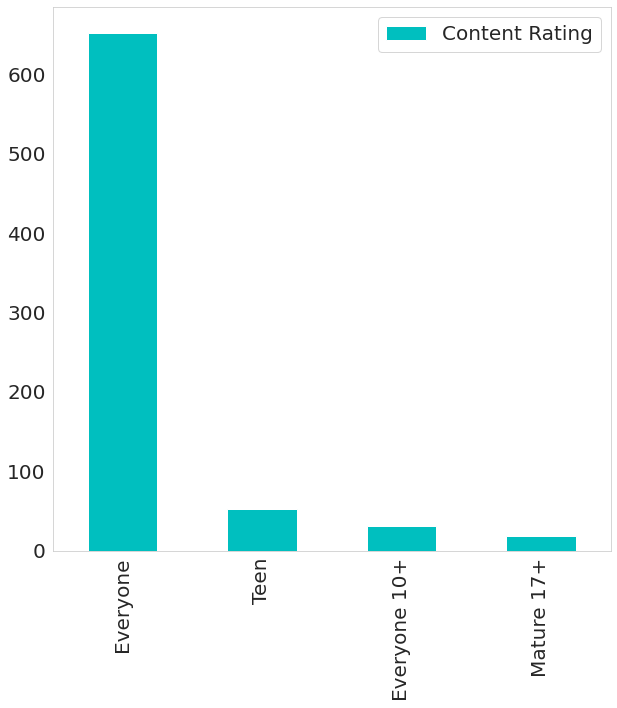

In [ ]:
app_paid_df['Content Rating'].value_counts().plot.bar(figsize=(10,10),color='c')
plt.legend()

### **4). Distribution of Paid and Free app updated over the Month**

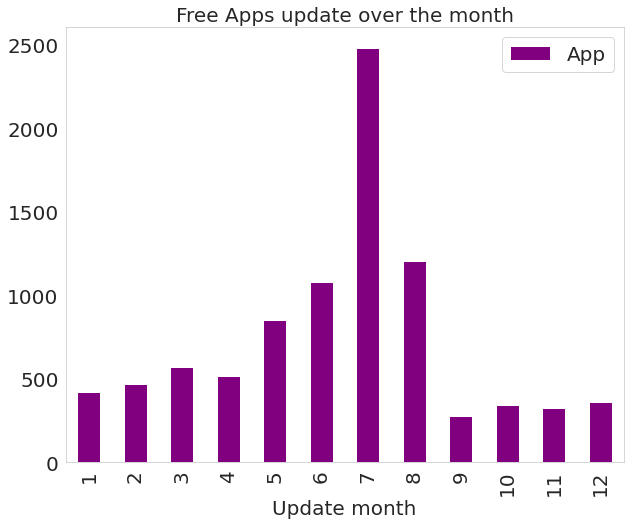

In [ ]:
free_df.groupby("Update month")["App"].count().plot.bar(figsize=(10,8), color='purple')
plt.title("Free Apps update over the month", size=20)
plt.legend()

In this data almost 50% apps are added or updated on the month of July, 25% of apps are updated or added on the month of August and rest of 25% remaining months.

In [ ]:
app_paid_df["Update month"] = app_paid_df["Last Updated"].apply(lambda x: x.strftime('%m')).astype('int64') 
free_df["Update month"] = free_df["Last Updated"].apply(lambda x: x.strftime('%m')).astype('int64') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


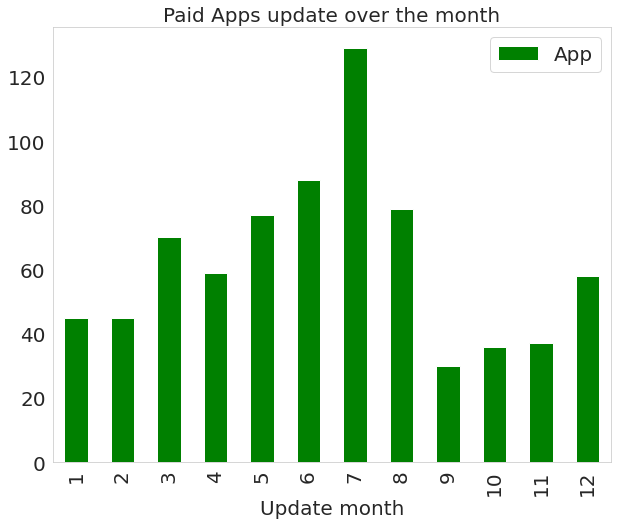

In [ ]:
app_paid_df.groupby("Update month")["App"].count().plot.bar(figsize=(10,8), color= "green")
plt.title("Paid Apps update over the month", size=20)
plt.legend()

Most of the paid apps too updates in the month of July same as free apps.

### **5). Distribution of App update over the Year**

In [ ]:
app_paid_df["Update year"] = app_paid_df["Last Updated"].apply(lambda x: x.strftime('%Y')).astype('int64') 
free_df["Update year"] = free_df["Last Updated"].apply(lambda x: x.strftime('%Y')).astype('int64') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


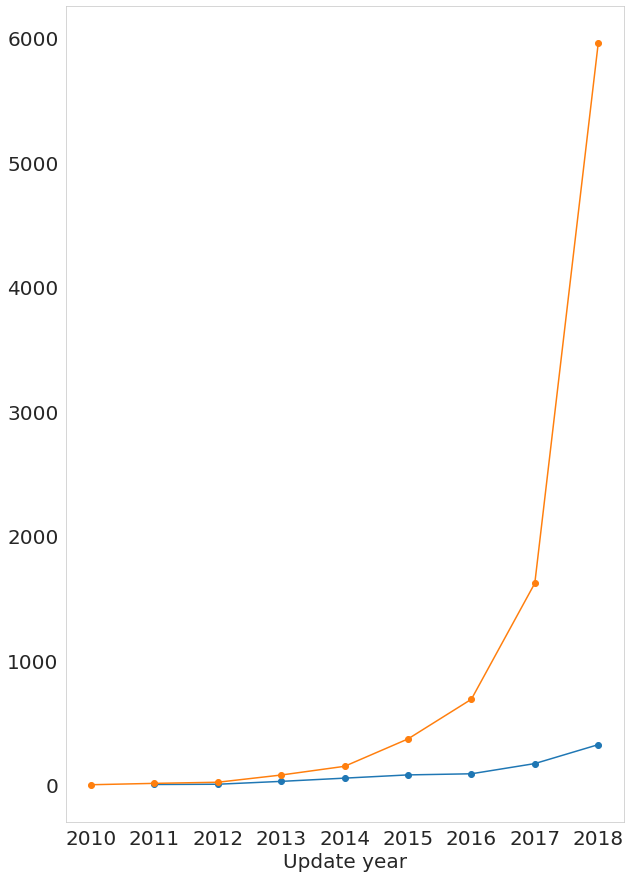

In [ ]:
app_paid_df.groupby("Update year")["App"].count().plot.line(marker='o')
free_df.groupby('Update year')['App'].count().plot.line(marker='o')

# **Summary and Conclusion**

* Percentage of apps that are top rated = ~80%
* The median size of all apps in the play store is 12 MB.
* 8783 Apps are having size less than 50 MB. 7749 Apps are having rating more than 4.0 including both type of apps.
* Category in which the paid apps have the highest average installation fee: Finance
* There are 20 free apps that have been installed over a billion times.
* Family, Game and Tools are top three categories having 1906, 926 and 829 app count.
* Percentage of free apps = ~92%
* The apps whose size is greater than 90 MB has the highest number of average user reviews, ie, they are more popular than the rest.
* Minecraft is the only app in the paid category with over 10M installs. This app has also produced the most revenue only from the installation fee.
* Tools, Entertainment, Education, Buisness and Medical are top Genres.
* Percentage of apps that are top rated = ~80%
* The apps whose size varies with device has the highest number average app installs.
* Overall sentiment count of merged dataset in which Positive sentiment count is 64%, Negative 22% and Neutral 13%.
* Helix Jump has the highest number of positive reviews and Angry Birds Classic has the highest number of negative reviews.
* Most competitive category: Family
* Category with the highest average app installs: Game
* The apps whose size varies with device has the highest number average app installs.


**1.Installs**

Majority of the apps come into these three categories, Family, Game, and Tools.

Maximum number of apps present in google play store come under Family, Game and tools but as per the installation and requirement in the market plot, scenario is not the same. Maximum installed apps comes under Game, Communication, Productivity and Social.

Subway Surfers, Facebook, Messenger and Google Drive are the most installed apps.

**2.Type(Free/Paid)**

About 92% apps are free and 8% apps are of paid type.

The category ‘Family’ has the highest number of paid apps.

Free apps are installed more than paid apps.

The app “I’m Rich — Trump Edition” from the category ‘Lifestyle’ is the most costly app priced at $400

3.Size

Maximum number of applications present in the dataset are of small size.

4.Rating

Most of the apps have rating in between 4 and 5.

Most numbers of apps are rated at 4.3

**5.Sentiment**

Most of the reviews are of Positive Sentiment, while Negative and Neutral have low number of reviews.

**6.Content Rating**

Content having Everyone only has most installs, while unrated and Adults only 18+ have less installs.

**7.Sentiment**

Most of the reviews are of Positive Sentiment, while Negative and Neutral have low number of reviews.

**8.Sentiment Polarity / Sentiment Subjectivity**

Collection of reviews shows a wide range of subjectivity and most of the reviews fall in [-0.50,0.75] polarity scale implying that the extremely negative or positive sentiments are significantly low. Most of the reviews show a mid-range of negative and positive sentiments.

Sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low.

Sentiment Polarity is not highly correlated with Sentiment Subjectivity.

## **Challenges & Future Work**

1. Our major challenge was data cleaning.
2. 13.60% of reviews were NaN values, and even after merging both the dataframes, we could not infer much in order to fill them. Thus we had to drop them.
3. The merged data frame of both play store and user reviews, had only 816 common apps. This is just 10% of the cleaned data, we could have given more valuable analysis, if we had atleast 70% - 80% of the data available in the merged dataframes.
4. User Reviews had 42% of NaN values, which could have been used for developing an understanding of the category wise sentiments, which would help us to fill 13.60% NaN values of the Reviews column.
5. There is so much more which can be explored. Like we have current version, android version available which can be explored in detail and we can come out with more analysis 
6. where we can tell how does these things effect and needs to be kept in mind while developing app for the users.
We can explore the correlation between the size of the app and the version of Android on the number of installs.
7. Machine learning can help us to deploy more insights by developing models which can help us interpret even more better. We have left this as future work as this is something where we can work on.